


<p style= "background-color:#000000;font-family:Georgia;color:#FEFBE9;font-size:300%;text-align:center;border-radius:20px 60px;overflow:hidden;border-style:dotted;border-width:1.8px;border-color:#FEFBE9;"><b>CRM ANALYTICS</b></p> 



<div style="float:center;margin-left:10px;max-width:100%;">

<img src ='https://serving.photos.photobox.com/00882225b4c9849d525427abe2dffb339d20b4972046e0d9836e3fd2b2534e9afbfc39af.jpg'>

</div>


<p style= "background-color:#000000;font-family:Georgia;color:#FEFBE9;font-size:300%;text-align:center;border-radius:20px 60px;overflow:hidden;border-style:dotted;border-width:1.8px;border-color:#FEFBE9;"><b>CUSTOMER RELATIONSHIP MANAGEMENT</b></p>

<p style='font-family:Lucida Console; text-align:left; color: red;font-size:18px'> Attribute Information: </p>

* InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation. (Fatura Numarasi)
* StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name. Nominal.
* Quantity: The quantities of each product (item) per transaction. Numeric.
* InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.
* UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).
* CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
* Country: Country name. Nominal. The name of the country where a customer resides.

<p style= "background-color:#000000;font-family:Georgia;color:#FEFBE9;font-size:300%;text-align:center;border-radius:20px 60px;overflow:hidden;border-style:dotted;border-width:1.8px;border-color:#FEFBE9;"><b>CUSTOMER RELATIONSHIP MANAGEMENT</b></p>


<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<p></p><div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home" style = "background-color:#000000;font-family:Georgia;color:#FEFBE9;font-size:200%;text-align:LEFT;border-radius:20px 40px;overflow:hidden;border-style:dotted;border-width:1.8px;border-color:#FEFBE9;">Table of Contents</h3>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#1" role="tab" aria-controls="home" target="_self" style = "color:#000000; font-family:Charter;font-size:120%;">Data Understanding(Veriyden Anlam Çıkarma)<span class="badge badge-primary badge-pill">1</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#2" role="tab" aria-controls="messages" target="_self" style = "color:#000000; font-family:Charter;font-size:120%;">Data Preparation(Veri Hazırlama)<span class="badge badge-primary badge-pill">2</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#3" role="tab" aria-controls="settings" target="_self" style = "color:#000000; font-family:Charter;font-size:120%;">RFM Metrics(RFM Metriklerinin Hesaplanması)<span class="badge badge-primary badge-pill">3</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#4" role="tab" aria-controls="settings" target="_self" style = "color:#000000; font-family:Charter;font-size:120%;">RFM Scores & Segments (RFM Skorlarının & Segmentlerinin Hesaplanması)<span class="badge badge-primary badge-pill">4</span></a> 
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#5" role="tab" aria-controls="settings" target="_self" style = "color:#000000; font-family:Charter;font-size:120%;">RFM Model Evaluation & Cohort Analysis(Analiz ve Değerlendirme)<span class="badge badge-primary badge-pill">5</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#6" role="tab" aria-controls="settings" target="_self" style = "color:#000000; font-family:Charter;font-size:120%;">Customer Lifetime Value(CLV)(Müşteri Yaşam Boyu Değeri)<span class="badge badge-primary badge-pill">6</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#7" role="tab" aria-controls="settings" target="_self" style = "color:#000000; font-family:Charter;font-size:120%;">BG-NBD & Gamma-Gamma (Beklenen işlem sayısı & Beklenen ortalama kar)<span class="badge badge-primary badge-pill">7</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#8" role="tab" aria-controls="settings" target="_self" style = "color:#000000; font-family:Charter;font-size:120%;">Calculation of CLTV(CLTV'nin hesaplanması)<span class="badge badge-primary badge-pill">8</span></a>
     <a class="list-group-item list-group-item-action" data-toggle="list" href="#9" role="tab" aria-controls="settings" target="_self" style = "color:#000000; font-family:Charter;font-size:120%;">Segmentation with CLTV(CLTV'ye Göre Segmentlerin Oluşturulması)<span class="badge badge-primary badge-pill">9</span></a>

</div>
</div>
</div>

In [1]:
!pip install openpyxl
!pip install xlrd
!pip install lifetimes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 3.4 MB/s eta 0:00:00


In [2]:
# Temel kütüphanelerimiz.
import pandas as pd
import numpy as np
import warnings
from datetime import datetime

# Beklenti hesaplamak için kullanacağımız kütüphaneler.
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (silhouette_score,
                             calinski_harabasz_score,
                             davies_bouldin_score)
# Görselleştirme için kullandığımız kütüphaneler.
from lifetimes.plotting import plot_period_transactions
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.graph_objs as go
from plotly.offline import iplot
from operator import attrgetter
import squarify
sns.set_style('whitegrid')
palette = 'Set2'

# Birtakım ayarlar.
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df = pd.read_excel('/kaggle/input/online-retail-ii-data-set/online_retail_II.xlsx', sheet_name='Year 2010-2011')
df_ = df.copy()
df.head().style.set_properties(**{"background-color": "#000000","color":"#FFEA20","border": "0.2px solid white"})

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550000,17850.000000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390000,17850.000000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750000,17850.000000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390000,17850.000000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390000,17850.000000,United Kingdom


<p style= "background-color:#000000;font-family:Georgia;color:#FEFBE9;font-size:300%;text-align:center;border-radius:20px 60px;overflow:hidden;border-style:dotted;border-width:1.8px;border-color:#FEFBE9;"><b>DATA UNDERSTANDING</b></p>

In [4]:
  
def check_df(dataframe, head=5):
    print(" SHAPE ".center(70,'-'))
    print('Rows: {}'.format(dataframe.shape[0]))
    print('Columns: {}'.format(dataframe.shape[1]))
    print(" TYPES ".center(70,'-'))
    print(dataframe.dtypes)
    print(" HEAD ".center(70,'-'))
    print(dataframe.head(head))
    print(" TAIL ".center(70,'-'))
    print(dataframe.tail(head))
    print(" MISSING VALUES ".center(70,'-'))
    print(dataframe.isnull().sum())
    print(" DUPLICATED VALUES ".center(70,'-'))
    print(dataframe.duplicated().sum())
    print(" DESCRIBE ".center(70,'-'))
    print(dataframe.describe([0, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1]).T)
    
check_df(df)

------------------------------- SHAPE --------------------------------
Rows: 541910
Columns: 8
------------------------------- TYPES --------------------------------
Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object
-------------------------------- HEAD --------------------------------
  Invoice StockCode                          Description  Quantity         InvoiceDate  Price  Customer ID         Country
0  536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00  2.550    17850.000  United Kingdom
1  536365     71053                  WHITE METAL LANTERN         6 2010-12-01 08:26:00  3.390    17850.000  United Kingdom
2  536365    84406B       CREAM CUPID HEARTS COAT HANGER         8 2010-12-01 08:26:00  2.750    17850.000  United Kingdom
3  536365    8402

In [5]:
# Eşsiz ürün sayımızı görmek için:
df["Description"].nunique()

4223

In [6]:
# Sütundaki NaN olmayan her bir unique değerin kaç kez kullanıldığını görmek istersek:
df["Description"].value_counts().head(10)

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
Name: Description, dtype: int64

In [7]:
# Herbir ürünümüzün toplam kaç işleme konu olduğunu görelim.
df.groupby("Description").agg({"Quantity": "sum"}).sort_values("Quantity", ascending=False).head().style.set_properties(**{"background-color": "#000000","color":"#FFEA20","border": "0.2px solid white"})

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
JUMBO BAG RED RETROSPOT,47363
ASSORTED COLOUR BIRD ORNAMENT,36381
POPCORN HOLDER,36334
PACK OF 72 RETROSPOT CAKE CASES,36039


In [8]:
# Herbir ürünün sterlin cinsinden fiyat bilgisini(Price) ile sipariş sayısı(Quanyity) bilgisini çarparak toplam tutar bilgisine ulaşalım.
# Bir üründen birden çok alınabilir.Firmamız perakende çalışıyor)
df["TotalPrice"] = df["Quantity"] * df["Price"]
df["TotalPrice"].head()

0   15.300
1   20.340
2   22.000
3   20.340
4   20.340
Name: TotalPrice, dtype: float64

In [9]:
# Aşağıdaki işlem ile 'İnvoice' kırılımında 'TotalPrice' bilgilerinin toplamına erişerek fatura başına ödenen toplam tutara erişebiliriz.
# Bir faturada birden fazla ürün olabilir.)
df.groupby("Invoice").agg({"TotalPrice": "sum"}).sort_values(by='TotalPrice', ascending=False).head(8).style.set_properties(**{"background-color": "#000000","color":"#FFEA20","border": "0.2px solid white"})


,TotalPrice
Invoice,
581483,168469.600000
541431,77183.600000
574941,52940.940000
576365,50653.910000
556444,38970.000000
567423,31698.160000
556917,22775.930000
572209,22206.000000


In [10]:
# Uluslar arası çalışan firmamızın yoğunluklu olarak satış yapmakta olduğu bçlgeleri bölgeleri görselleştirmek ve sunumumuza eklemek istiyoruz.
df['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8558
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [11]:
# 'Country ID' yi hataya mahal vermemek için aşagıdaki gibi değiştiriyoruz.
df.columns = df.columns.str.replace(' ', '')
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'CustomerID', 'Country', 'TotalPrice'], dtype='object')

In [12]:
world_map = df[['CustomerID', 'Invoice', 'Country']
              ].groupby(['CustomerID', 'Invoice', 'Country']
                       ).count().reset_index(drop = False)
countries = world_map['Country'].value_counts()
data = dict(type='choropleth',
            locations = countries.index,
            locationmode = 'country names',
            z = countries,
            text = countries.index,
            colorbar = {'title':'Orders'},
            colorscale='Viridis',
            reversescale = False)

layout = dict(title={'text': "Number of Orders by Countries",
                     'y':0.9,
                     'x':0.5,
                     'xanchor': 'center',
                     'yanchor': 'top'},
              geo = dict(resolution = 50,
                         showocean = True,
                         oceancolor = "LightBlue",
                         showland = True,
                         landcolor = "whitesmoke",
                         showframe = True),
             template = 'plotly_white',
             height = 600,
             width = 1000)

choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate = False)

<p style= "background-color:#000000;font-family:Georgia;color:#FEFBE9;font-size:300%;text-align:center;border-radius:20px 60px;overflow:hidden;border-style:dotted;border-width:1.8px;border-color:#FEFBE9;"><b>DATA PREPARATION</b></p>

In [13]:
# MIUUL'un hediyesi hazır tıraşlama formülümüzü 'price' ve 'quantity' özelinde çalıştıralım.
# Bu işlemi uygulamamızın sebebi aykırı değerlerin tahmin işlemlerine olumsuz etkide bulunmasını önlemektir.
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    
replace_with_thresholds(df, "Quantity")
replace_with_thresholds(df, "Price")

In [14]:
# Yukarıda CustomerID satırında boş değerler olduğunu görmüştük. Bizim için görmezden gelinemeyek bu eksik gözlemleri siliyoruz.
df.dropna(inplace=True)
# Veri setinin ayrıntısında fatura kodunda 'C' ibaresi bulunanların iptal işlemi olduğunu görmüştük. Bu sebepten iptal faturaları silmek için:
df = df[~df['Invoice'].astype(str).str.contains('C', na=False)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397925 entries, 0 to 541909
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      397925 non-null  object        
 1   StockCode    397925 non-null  object        
 2   Description  397925 non-null  object        
 3   Quantity     397925 non-null  int64         
 4   InvoiceDate  397925 non-null  datetime64[ns]
 5   Price        397925 non-null  float64       
 6   CustomerID   397925 non-null  float64       
 7   Country      397925 non-null  object        
 8   TotalPrice   397925 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


<p style= "background-color:#000000;font-family:Georgia;color:#FEFBE9;font-size:300%;text-align:center;border-radius:20px 60px;overflow:hidden;border-style:dotted;border-width:1.8px;border-color:#FEFBE9;"><b>CALCULATING RFM METRICS</b></p>

In [15]:
# Hesabımızın doğru olması için son fatura tarihine yakın bir tarihte bu işlemi yapmış olmamız bekleneceğinden:
df["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [16]:
today_date = datetime(2011, 12, 11)
# RFM metriklerini hesaplayalım..
# Recency : Müşterinin son alışverişinin üzerinden geçen zaman.
# Frequency: Müşterinin toplam alışveriş sayısı
# Monetary: Müşterinin tüm süreçte toplam bıraktığı para

rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (today_date - x.max()).days,
                                     'Invoice': lambda x: x.nunique(),
                                     'TotalPrice': lambda x: x.sum()})

rfm.columns = ['recency', 'frequency', 'monetary']
# İadelerden doğabilecek negatif değerleri ve 0 değerleri kaldıralım.
rfm = rfm[rfm["monetary"] > 0]

rfm.head().style.set_properties(**{"background-color": "#000000","color":"#FFEA20","border": "0.2px solid white"})

,recency,frequency,monetary
CustomerID,,,
12346.0,326,1,77183.600000
12347.0,3,7,4310.000000
12348.0,76,4,1797.240000
12349.0,19,1,1757.550000
12350.0,311,1,334.400000


In [17]:
rfm.dtypes

recency        int64
frequency      int64
monetary     float64
dtype: object

In [18]:
# Oluşturacağımız fonksiyon ile RFM skorlarını belirleyelim.

def get_rfm_scores(dataframe):

    dataframe["recency_score"] = pd.qcut(dataframe["recency"], 5, labels=[5, 4, 3, 2, 1])
    dataframe["frequency_score"] = pd.qcut(dataframe["frequency"].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
    dataframe["monetary_score"] = pd.qcut(dataframe["monetary"], 5, labels=[1, 2, 3, 4, 5])
    dataframe["RFM_SCORE"] = dataframe["recency_score"].astype(str) + dataframe["frequency_score"].astype(str)

    return dataframe

get_rfm_scores(rfm)
rfm = rfm.reset_index()
rfm.head().style.set_properties(**{"background-color": "#000000","color":"#FFEA20","border": "0.2px solid white"})

,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
0,12346.000000,326,1,77183.600000,1,1,5,11
1,12347.000000,3,7,4310.000000,5,5,5,55
2,12348.000000,76,4,1797.240000,2,4,4,24
3,12349.000000,19,1,1757.550000,4,1,4,41
4,12350.000000,311,1,334.400000,1,1,2,11


<p style= "background-color:#000000;font-family:Georgia;color:#FEFBE9;font-size:300%;text-align:center;border-radius:20px 60px;overflow:hidden;border-style:dotted;border-width:1.8px;border-color:#FEFBE9;"><b>CREATING & ANALYISIN RFM SEGMENTS</b></p>

In [19]:
# RFM skorlarından faydalanarak RFM segmentlerini belirleyelim.

seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex = True)

rfm.head().style.set_properties(**{"background-color": "#000000","color":"#FFEA20","border": "0.2px solid white"})

,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
0,12346.000000,326,1,77183.600000,1,1,5,11,hibernating
1,12347.000000,3,7,4310.000000,5,5,5,55,champions
2,12348.000000,76,4,1797.240000,2,4,4,24,at_Risk
3,12349.000000,19,1,1757.550000,4,1,4,41,promising
4,12350.000000,311,1,334.400000,1,1,2,11,hibernating


In [20]:
# Dha etkili yorumlarda bulunabilmek için segmentler kırılımında değişkenlerimize bir takım işlemler uygulayabiliriz.
rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(["mean", "count"]).style.set_properties(**{"background-color": "#000000","color":"#FFEA20","border": "0.2px solid white"})

In [21]:
# Kritik aşamada olan, kaybedilmemesi gerek müşterilerimizi görelim.
rfm[rfm["segment"] == "cant_loose"].head().style.set_properties(**{"background-color": "#000000","color":"#FFEA20","border": "0.2px solid white"})

,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
241,12643.000000,129,6,3344.640000,2,5,5,25,cant_loose
400,12853.000000,135,6,1957.100000,2,5,4,25,cant_loose
410,12868.000000,186,6,1607.060000,1,5,4,15,cant_loose
464,12947.000000,144,6,1603.990000,2,5,4,25,cant_loose
485,12980.000000,158,9,7374.900000,2,5,5,25,cant_loose


<p style= "background-color:#000000;font-family:Georgia;color:#FEFBE9;font-size:300%;text-align:center;border-radius:20px 60px;overflow:hidden;border-style:dotted;border-width:1.8px;border-color:#FEFBE9;"><b>RFM MODEL EVALUATION & COHORT ANALYSIS</b></p>

In [22]:
# RFM modelimizi aşağıdaki kriterler özelinde değerlendirelim.

print(' RFM Model Evaluation '.center(70, '*'))
X = rfm[['recency_score', 'frequency_score']]
labels = rfm['segment']
print(f'Number of Observations: {X.shape[0]}')
print(f'Number of Segments: {labels.nunique()}')
print(f'Silhouette Score: {round(silhouette_score(X, labels), 3)}')
print(f'Calinski Harabasz Score: {round(calinski_harabasz_score(X, labels), 3)}')
print(f'Davies Bouldin Score: {round(davies_bouldin_score(X, labels), 3)} \n{70*"*"}')

************************ RFM Model Evaluation ************************
Number of Observations: 4338
Number of Segments: 10
Silhouette Score: 0.471
Calinski Harabasz Score: 4590.526
Davies Bouldin Score: 0.633 
**********************************************************************


<Figure size 2000x1500 with 0 Axes>

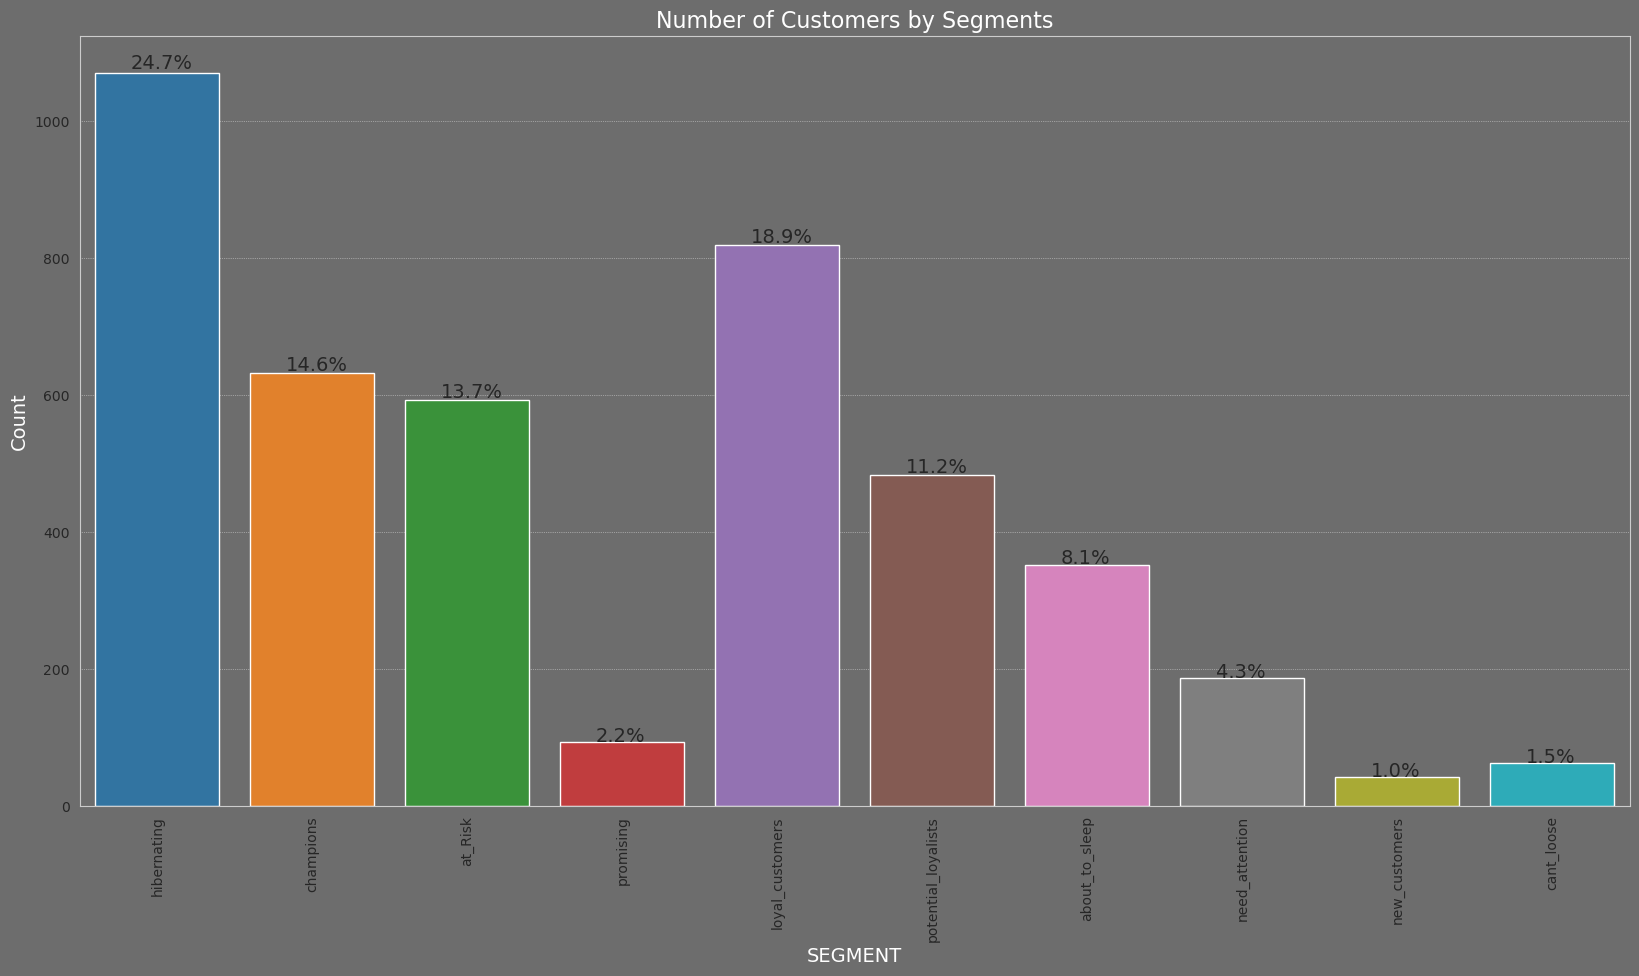

In [23]:
# RFM segmentlerimizi bir grafik üzerinde çok daha kolay anlamlandırabiliriz.

background = "#313332"
backgroundr = "#6D6D6D"
text_color = "w"
title_font="Alegreya Sans"

plt.figure(figsize=(20,15))
fig, ax = plt.subplots(figsize=(20,10))
ax.patch.set_facecolor(backgroundr)
fig.set_facecolor(backgroundr)
fig.facecolor="white"
fig.edgecolor="white"

ax.grid(ls="dotted",lw=0.5,color="lightgrey",zorder=1)
bar_ap = sns.countplot(data = rfm,
                   x = 'segment')
total = len(rfm.segment)
for patch in ax.patches:
    percentage = '{:.1f}%'.format(100 * patch.get_height()/total)
    x = patch.get_x() + patch.get_width() / 2 - 0.17
    y = patch.get_y() + patch.get_height() * 1.005
    ax.annotate(percentage, (x, y), size = 14)
bar_ap.set_xticklabels(bar_ap.get_xticklabels(), rotation=90)
plt.title('Number of Customers by Segments', size = 16, color=text_color)
plt.ylabel('Count', size = 14,color="white" )
plt.xlabel("SEGMENT",fontsize = 14,color="white" )
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()


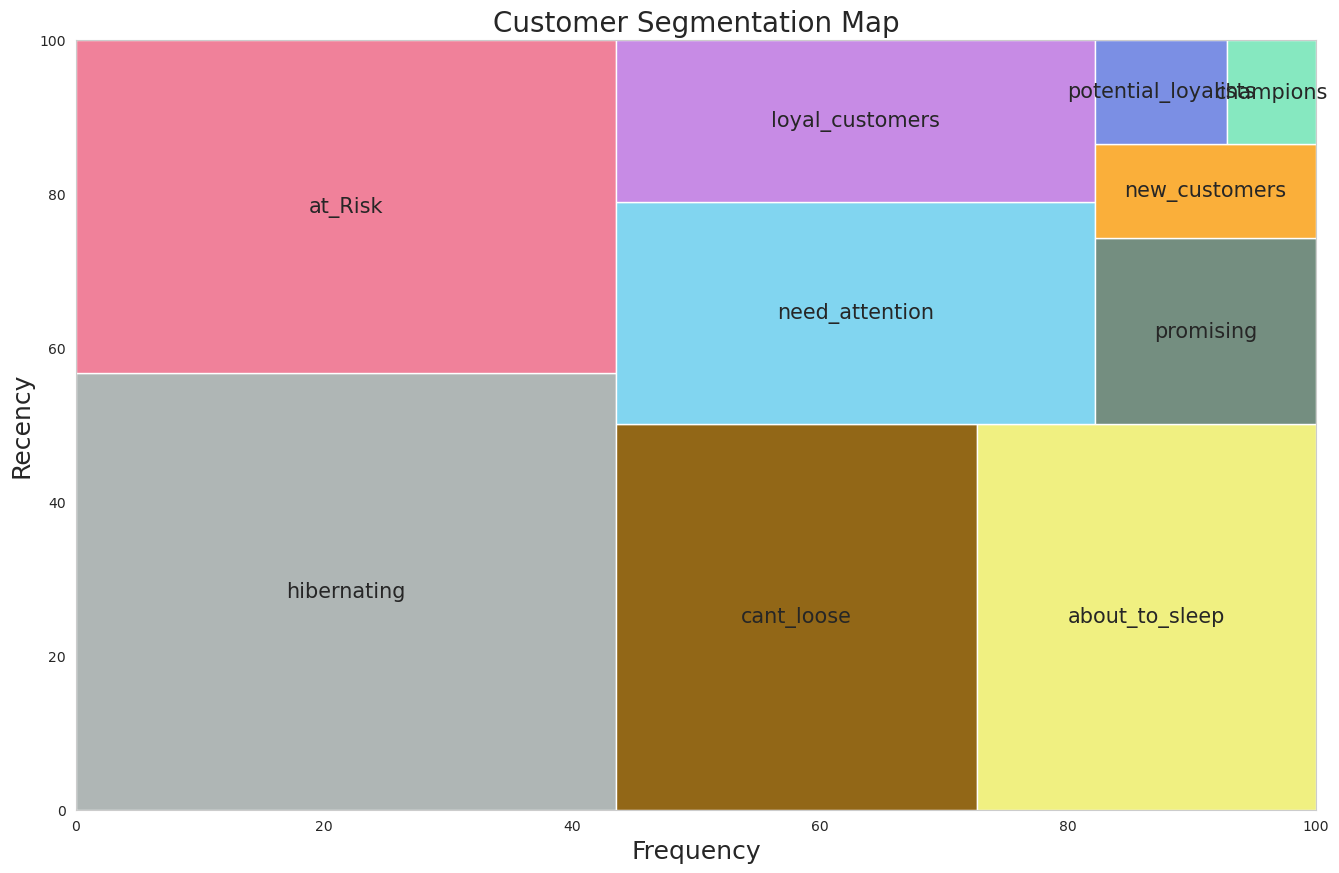

In [24]:
# Çalışmamızın müşteri segmentasyon haritası:

segments = rfm["segment"].value_counts().sort_values(ascending=False)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 10)
squarify.plot(
    sizes=segments,
    label=[label for label in seg_map.values()],
    color=[
        "#AFB6B5",
        "#F0819A",
        "#926717",
        "#F0F081",
        "#81D5F0",
        "#C78BE5",
        "#748E80",
        "#FAAF3A",
        "#7B8FE4",
        "#86E8C0",
    ],
    pad=False,
    bar_kwargs={"alpha": 1},
    text_kwargs={"fontsize": 15},
)
plt.title("Customer Segmentation Map", fontsize=20)
plt.xlabel("Frequency", fontsize=18)
plt.ylabel("Recency", fontsize=18)
plt.show()

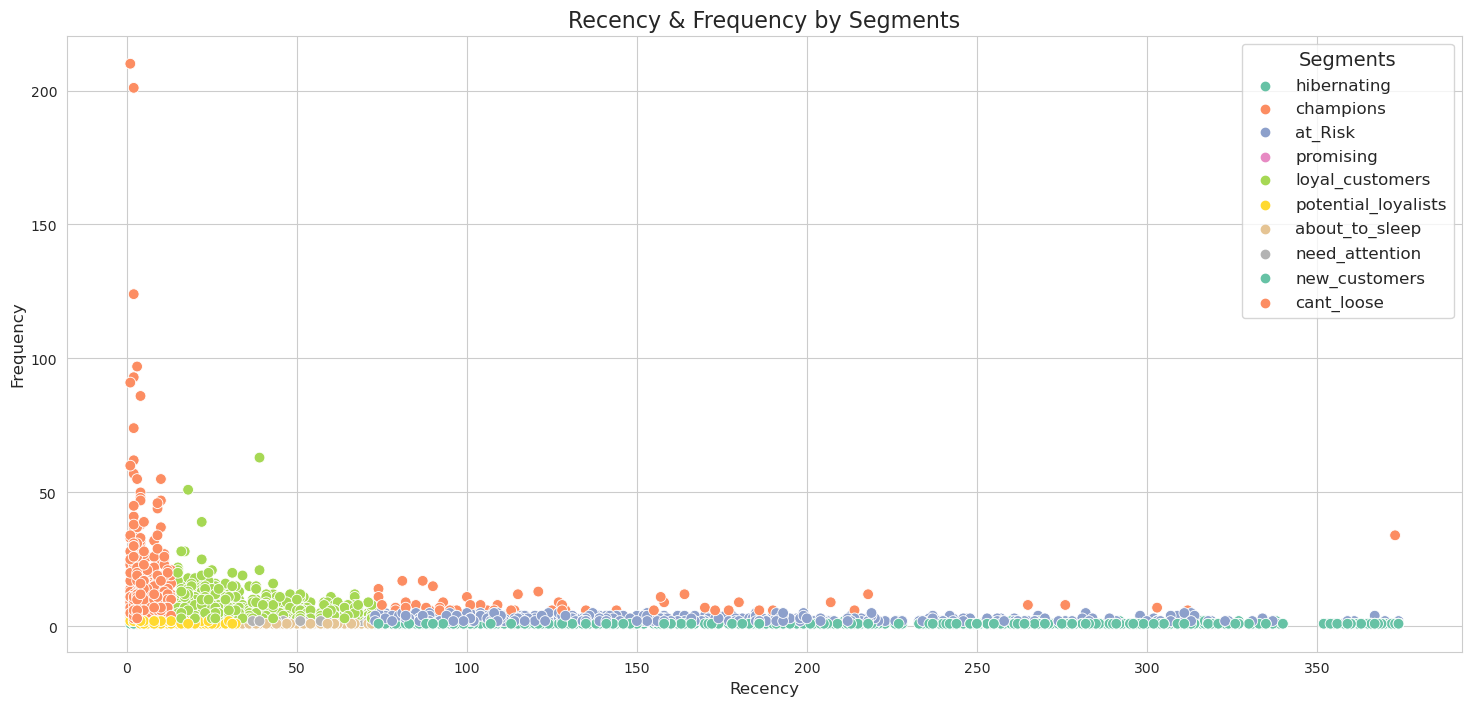

In [25]:

plt.figure(figsize=(18, 8))
sns.scatterplot(data=rfm, x="recency", y="frequency", hue="segment", palette=palette, s=60)
plt.title("Recency & Frequency by Segments", size=16)
plt.xlabel("Recency", size=12)
plt.ylabel("Frequency", size=12)
plt.xticks(size=10)
plt.yticks(size=10)
plt.legend(loc="best", fontsize=12, title="Segments", title_fontsize=14)
plt.show()

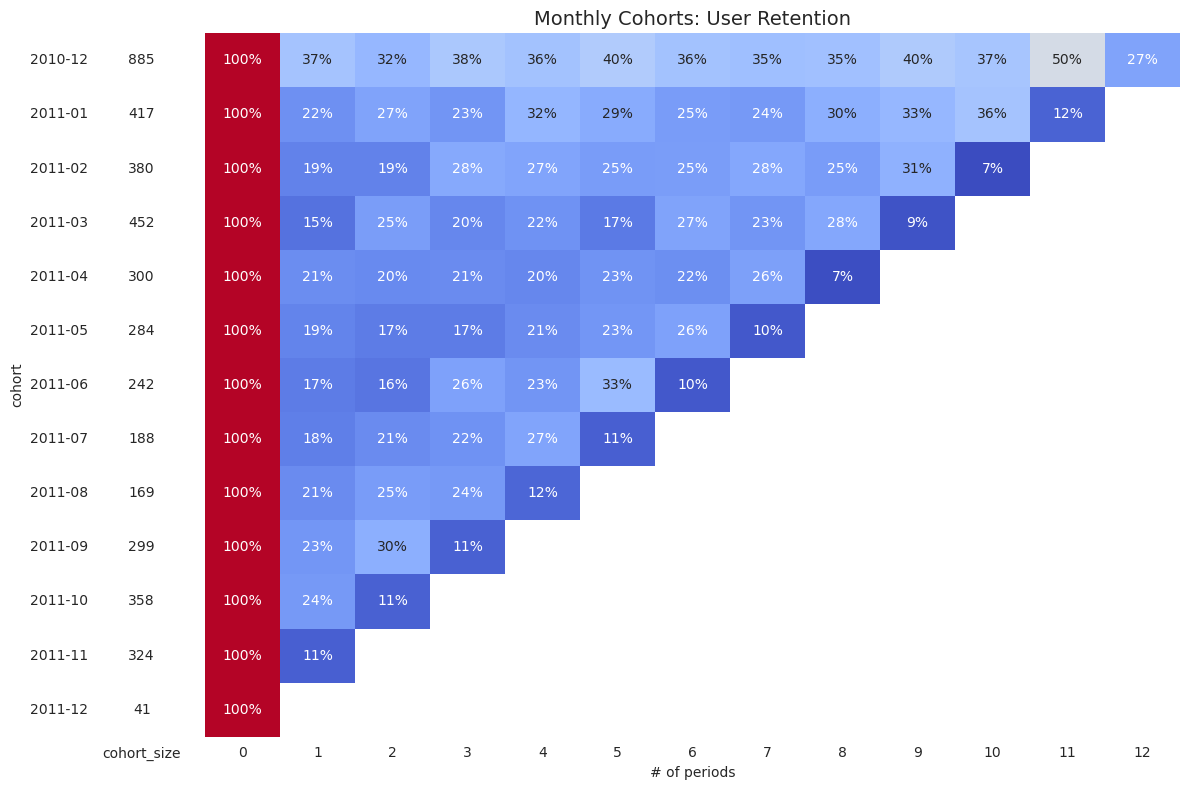

In [26]:
# Kohort Analizinde, bazı ortak kalıpları veya davranışlarında bulunan kullanici gruplarini kullanıcı gruplarını zaman içinde izleriz.
def CohortAnalysis(dataframe):

    dataframe = dataframe[["CustomerID", "Invoice", "InvoiceDate"]].drop_duplicates()
    dataframe["order_month"] = dataframe["InvoiceDate"].dt.to_period("M")
    dataframe["cohort"] = (dataframe.groupby("CustomerID")["InvoiceDate"].transform("min").dt.to_period("M"))
    cohort_data = (dataframe.groupby(["cohort", "order_month"]).agg(n_customers=("CustomerID", "nunique")).reset_index(drop=False))
    cohort_data["period_number"] = (cohort_data.order_month - cohort_data.cohort).apply(attrgetter("n"))
    cohort_pivot = cohort_data.pivot_table(index="cohort", columns="period_number", values="n_customers")
    cohort_size = cohort_pivot.iloc[:, 0]
    retention_matrix = cohort_pivot.divide(cohort_size, axis=0)
    with sns.axes_style("white"):
        fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={"width_ratios": [1, 11]})
        sns.heatmap(retention_matrix,mask=retention_matrix.isnull(), annot=True, cbar=False, fmt=".0%", cmap="coolwarm", ax=ax[1],)
        ax[1].set_title("Monthly Cohorts: User Retention", fontsize=14)
        ax[1].set(xlabel="# of periods", ylabel="")
        white_cmap = mcolors.ListedColormap(["white"])
        sns.heatmap(pd.DataFrame(cohort_size).rename(columns={0: "cohort_size"}),annot=True,cbar=False,fmt="g",cmap=white_cmap,ax=ax[0],)
        fig.tight_layout()
    
CohortAnalysis(df)

In [27]:
rfm.to_csv("/kaggle/working/rfm.csv")

<p style= "background-color:#000000;font-family:Georgia;color:#FEFBE9;font-size:300%;text-align:center;border-radius:20px 60px;overflow:hidden;border-style:dotted;border-width:1.8px;border-color:#FEFBE9;"><b>CUSTOMER LIFETIME VALUE</b></p>

* Formula

Probabilistic lifetime value estimation with time projection
    
    
*     average_order_value = total_price / total_transaction)
*     Purchase Frequency (total_transaction / total_number_of_customers)
*     Repeat Rate & Churn Rate
*     profit_margin =  total_price * 0.10
*     customer_value = average_order_value * purchase_frequency)
*     CLTV = (customer_value / churn_rate) x profit_margin)
*     Segmentation
*     CLTV = Expected Number of Transaction(BG/NBD) * Expected Average Profit(gamma gamma)

Above, purchase frequency and number of transaction mean the same thing. Likewise, Average Order Value and Average Profit mean the same thing. It differs with the Expected part that happens to them.

CAUTION: It will add a probabilistic distribution. Expected statement refers to this part. Expected number of purchases, expected profitability.

BG / NBD = Expected Transaction
Gamma Gamma = Expected Profit

*    recency: the difference between the customer's last purchase and his first purchase
*    T: the age of the client in the company
*    frequency: total number of repeat purchases
*    monetary_value: average earnings per purchase

In [28]:
# 'total_transaction' : Müşteri özelinde eşsiz fatura sayısı
# 'total_unit'        : Müştei özelinde satın alınan toplam ürün adedi
# 'total_price'        :  Müşteri özelinde toplam harcanan tutar

cltv = df.groupby('CustomerID').agg({'Invoice': lambda x: x.nunique(),
                                        'Quantity': lambda x: x.sum(),
                                        'TotalPrice': lambda x: x.sum()})

cltv.columns = ['total_transaction', 'total_unit', 'total_price']

cltv.head().style.set_properties(**{"background-color": "#000000","color":"#FFEA20","border": "0.2px solid white"})


,total_transaction,total_unit,total_price
CustomerID,,,
12346.0,1,253,77183.600000
12347.0,7,2458,4310.000000
12348.0,4,2341,1797.240000
12349.0,1,631,1757.550000
12350.0,1,197,334.400000


In [29]:
# CLTV metriklerinin hesaplanması
cltv["average_order_value"] = cltv["total_price"] / cltv["total_transaction"]
cltv["purchase_frequency"] = cltv["total_transaction"] / cltv.shape[0]
repeat_rate = cltv[cltv["total_transaction"] > 1].shape[0] / cltv.shape[0]
churn_rate = 1 - repeat_rate
cltv['profit_margin'] = cltv['total_price'] * 0.10
cltv['customer_value'] = cltv['average_order_value'] * cltv["purchase_frequency"]
cltv["cltv"] = (cltv["customer_value"] / churn_rate) * cltv["profit_margin"]

cltv.head().style.set_properties(**{"background-color": "#000000","color":"#FFEA20","border": "0.2px solid white"})

,total_transaction,total_unit,total_price,average_order_value,purchase_frequency,profit_margin,customer_value,cltv
CustomerID,,,,,,,,
12346.0,1,253,77183.600000,77183.600000,0.000230,7718.360000,17.788338,398748.869408
12347.0,7,2458,4310.000000,615.714286,0.001613,431.000000,0.993316,1243.380187
12348.0,4,2341,1797.240000,449.310000,0.000922,179.724000,0.414206,216.202920
12349.0,1,631,1757.550000,1757.550000,0.000230,175.755000,0.405059,206.759170
12350.0,1,197,334.400000,334.400000,0.000230,33.440000,0.077068,7.484830


In [30]:
# Sıralı verimize bir göz atalım.
cltv.sort_values(by="cltv", ascending=False).head().style.set_properties(**{"background-color": "#000000","color":"#FFEA20","border": "0.2px solid white"})

,total_transaction,total_unit,total_price,average_order_value,purchase_frequency,profit_margin,customer_value,cltv
CustomerID,,,,,,,,
14646.0,74,182169,280206.020000,3786.567838,0.017055,28020.602000,64.578479,5255382.439374
18102.0,60,51555,259657.300000,4327.621667,0.013828,25965.730000,59.842660,4512845.612001
17450.0,46,41234,194550.790000,4229.365000,0.010602,19455.079000,44.837702,2533467.864098
16446.0,2,255,168472.500000,84236.250000,0.000461,16847.250000,38.827495,1899798.076054
14911.0,201,79726,143825.060000,715.547562,0.046324,14382.506000,33.147052,1384581.518340


In [31]:
# CLTV segmentlerinin belirlenmesi
cltv["segment"] = pd.qcut(cltv["cltv"], 4, labels=["D", "C", "B", "A"])

# Segmentlere göre ayrıntılı analizler yapabiliriz.

cltv.groupby("segment").agg({"count", "mean", "sum"}).style.set_properties(**{"background-color": "#000000","color":"#FFEA20","border": "0.2px solid white"})


In [32]:
cltv.to_csv("/kaggle/working/cltc.csv")

<p style= "background-color:#000000;font-family:Georgia;color:#FEFBE9;font-size:300%;text-align:center;border-radius:20px 60px;overflow:hidden;border-style:dotted;border-width:1.8px;border-color:#FEFBE9;"><b>BG-NBD ve Gamma-Gamma ile CLTV Prediction</b></p>

In [33]:
# Prediction modellerimizi kurmadan önce modelimiz de kullanacağımız değişkenleri hesaplayalım. Bunlar:
# 'recency'  : Müşterinin son alışverişinin üzerinden geçen zaman (haftalık)
#     'T'    :  Müşterinin yaşı(ilk alışverişinin üzerinden geçen zaman)
# 'frequency' : Müşterinin alışveriş sayısı
#  'monetary'  : Müşterinin yaptığı alışverişlerin toplam tutarı

cltv_predict = df.groupby('CustomerID').agg({'InvoiceDate': [lambda InvoiceDate: (InvoiceDate.max() - InvoiceDate.min()).days,
                                                         lambda InvoiceDate: (today_date - InvoiceDate.min()).days],
                                         'Invoice': lambda Invoice: Invoice.nunique(),
                                         'TotalPrice': lambda TotalPrice: TotalPrice.sum()})

cltv_predict.columns = ['recency', 'T', 'frequency', 'monetary']

cltv_predict["monetary"] = cltv_predict["monetary"] / cltv_predict["frequency"]

cltv_predict = cltv_predict[(cltv_predict['frequency'] > 1)]
cltv_predict["recency"] = cltv_predict["recency"] / 7
cltv_predict["T"] = cltv_predict["T"] / 7

cltv_predict.head().style.set_properties(**{"background-color": "#000000","color":"#FFEA20","border": "0.2px solid white"})

,recency,T,frequency,monetary
CustomerID,,,,
12347.0,52.142857,52.571429,7,615.714286
12348.0,40.285714,51.285714,4,449.310000
12352.0,37.142857,42.428571,8,313.255000
12356.0,43.142857,46.571429,3,937.143333
12358.0,21.285714,21.571429,2,584.030000


In [34]:
#BGF Modelimizi kuralım

bgf = BetaGeoFitter(penalizer_coef=0.001)

bgf.fit(cltv_predict['frequency'],
        cltv_predict['recency'],
        cltv_predict['T'])

<lifetimes.BetaGeoFitter: fitted with 2845 subjects, a: 0.12, alpha: 11.40, b: 2.49, r: 2.18>

In [35]:
# 1 aylık süreçte alışveriş yapma ihtimali en yüksek olan müşteriler.

cltv_predict["expected_purc_1_month"] = bgf.conditional_expected_number_of_purchases_up_to_time(4,
                                                        cltv_predict['frequency'],
                                                        cltv_predict['recency'],
                                                        cltv_predict['T'])
cltv_predict.head().style.set_properties(**{"background-color": "#000000","color":"#FFEA20","border": "0.2px solid white"})

,recency,T,frequency,monetary,expected_purc_1_month
CustomerID,,,,,
12347.0,52.142857,52.571429,7,615.714286,0.563516
12348.0,40.285714,51.285714,4,449.310000,0.366752
12352.0,37.142857,42.428571,8,313.255000,0.727126
12356.0,43.142857,46.571429,3,937.143333,0.343511
12358.0,21.285714,21.571429,2,584.030000,0.486232


In [36]:
# 3 aylık süreçte alışveriş yapma ihtimali en yüksek olan müşteriler.

cltv_predict["expected_purc_3_month"] = bgf.predict(4 * 3,
                                               cltv_predict['frequency'],
                                               cltv_predict['recency'],
                                               cltv_predict['T'])
cltv_predict.head(10).style.set_properties(**{"background-color": "#000000","color":"#FFEA20","border": "0.2px solid white"})

,recency,T,frequency,monetary,expected_purc_1_month,expected_purc_3_month
CustomerID,,,,,,
12347.0,52.142857,52.571429,7,615.714286,0.563516,1.678394
12348.0,40.285714,51.285714,4,449.310000,0.366752,1.092006
12352.0,37.142857,42.428571,8,313.255000,0.727126,2.163117
12356.0,43.142857,46.571429,3,937.143333,0.343511,1.022127
12358.0,21.285714,21.571429,2,584.030000,0.486232,1.438802
12359.0,39.142857,47.428571,4,1593.145000,0.396616,1.180395
12360.0,21.142857,28.714286,3,887.353333,0.476249,1.412576
12362.0,41.714286,42.285714,10,522.623000,0.893010,2.656718
12363.0,18.857143,34.714286,2,276.000000,0.301106,0.894105


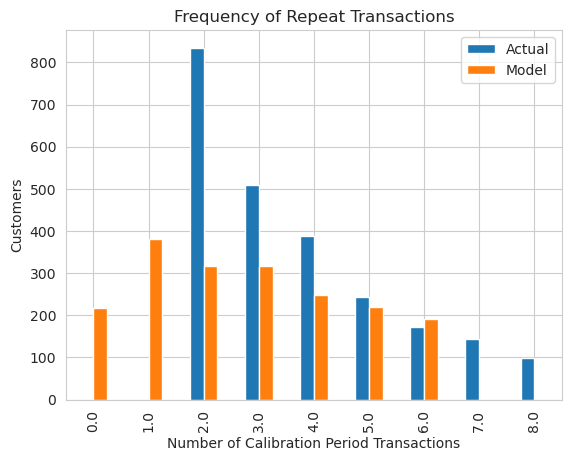

In [37]:
plot_period_transactions(bgf)
plt.show()

In [38]:
# Gamma gamma modeli
ggf = GammaGammaFitter(penalizer_coef=0.01)

In [39]:
# gamma gamma modelimizin kurulumu
ggf.fit(cltv_predict['frequency'], cltv_predict['monetary'])


<lifetimes.GammaGammaFitter: fitted with 2845 subjects, p: 3.79, q: 0.34, v: 3.72>

In [40]:
# Beklenen ortalama karin hesaplanmasi

ggf.conditional_expected_average_profit(cltv_predict['frequency'],
                                        cltv_predict['monetary']).sort_values(ascending=False).head(10)

CustomerID
16446.000   92300.886
15749.000   15764.032
15098.000   14129.583
12415.000    5998.391
12590.000    5406.242
12536.000    4461.678
16000.000    4388.011
18102.000    4340.322
12435.000    4291.698
17450.000    4245.570
dtype: float64

In [41]:
cltv_predict["expected_average_profit"] = ggf.conditional_expected_average_profit(cltv_predict['frequency'],
                                                                             cltv_predict['monetary'])
cltv_predict.head().style.set_properties(**{"background-color": "#000000","color":"#FFEA20","border": "0.2px solid white"})

,recency,T,frequency,monetary,expected_purc_1_month,expected_purc_3_month,expected_average_profit
CustomerID,,,,,,,
12347.0,52.142857,52.571429,7,615.714286,0.563516,1.678394,632.019673
12348.0,40.285714,51.285714,4,449.310000,0.366752,1.092006,470.803034
12352.0,37.142857,42.428571,8,313.255000,0.727126,2.163117,320.724048
12356.0,43.142857,46.571429,3,937.143333,0.343511,1.022127,996.409652
12358.0,21.285714,21.571429,2,584.030000,0.486232,1.438802,641.967861


In [42]:
cltv_predict.sort_values("expected_average_profit", ascending=False).head(10).style.set_properties(**{"background-color": "#000000","color":"#FFEA20","border": "0.2px solid white"})

,recency,T,frequency,monetary,expected_purc_1_month,expected_purc_3_month,expected_average_profit
CustomerID,,,,,,,
16446.0,29.142857,29.428571,2,84236.250000,0.393326,1.166587,92300.885839
15749.0,13.857143,47.571429,3,14844.766667,0.111556,0.331981,15764.032180
15098.0,0.000000,26.142857,3,13305.500000,0.040052,0.118716,14129.582601
12415.0,44.714286,48.285714,21,5948.310952,1.513975,4.508208,5998.390804
12590.0,0.000000,30.285714,2,4932.130000,0.045934,0.136265,5406.242392
12536.0,2.142857,8.571429,3,4200.610000,0.855978,2.516140,4461.677780
16000.0,0.000000,0.428571,3,4131.233333,1.664397,4.845252,4388.011101
18102.0,52.285714,52.571429,60,4327.621667,3.863856,11.511910,4340.321694
12435.0,26.857143,38.285714,2,3914.945000,0.304072,0.903509,4291.698433


<p style= "background-color:#000000;font-family:Georgia;color:#FEFBE9;font-size:300%;text-align:center;border-radius:20px 60px;overflow:hidden;border-style:dotted;border-width:1.8px;border-color:#FEFBE9;"><b>Calculation of CLTV</b></p>

In [43]:
# CLTV(Müşteri Yaşamboyu Değeri)'nin hesaplanmasi

cltv_result = ggf.customer_lifetime_value(bgf,
                                   cltv_predict['frequency'],
                                   cltv_predict['recency'],
                                   cltv_predict['T'],
                                   cltv_predict['monetary'],
                                   time=3,  # 3 aylık
                                   freq="W",  # T'nin frekans bilgisi.
                                   discount_rate=0.01)
cltv_result.head().sort_values(ascending=False)

CustomerID
12347.000   1128.654
12356.000   1083.507
12358.000    982.080
12352.000    738.058
12348.000    546.998
Name: clv, dtype: float64

In [44]:
# Olusturdugumuz CLTV degerini datafram e ekleyelım.
cltv_result = cltv_result.reset_index()
cltv_final = cltv_predict.merge(cltv_result, on="CustomerID", how="left")

cltv_final.head(10).style.set_properties(**{"background-color": "#000000","color":"#FFEA20","border": "0.2px solid white"})

,CustomerID,recency,T,frequency,monetary,expected_purc_1_month,expected_purc_3_month,expected_average_profit,clv
0,12347.000000,52.142857,52.571429,7,615.714286,0.563516,1.678394,632.019673,1128.653739
1,12348.000000,40.285714,51.285714,4,449.310000,0.366752,1.092006,470.803034,546.997685
2,12352.000000,37.142857,42.428571,8,313.255000,0.727126,2.163117,320.724048,738.058132
3,12356.000000,43.142857,46.571429,3,937.143333,0.343511,1.022127,996.409652,1083.507270
4,12358.000000,21.285714,21.571429,2,584.030000,0.486232,1.438802,641.967861,982.080404
5,12359.000000,39.142857,47.428571,4,1593.145000,0.396616,1.180395,1666.878534,2093.297029
6,12360.000000,21.142857,28.714286,3,887.353333,0.476249,1.412576,943.540811,1417.463774
7,12362.000000,41.714286,42.285714,10,522.623000,0.893010,2.656718,532.294509,1504.452639
8,12363.000000,18.857143,34.714286,2,276.000000,0.301106,0.894105,304.455043,289.536775
9,12364.000000,14.857143,16.142857,4,328.275000,0.864628,2.553962,344.240201,934.610618


In [45]:
cltv_final.sort_values(by="clv", ascending=False).head(10).style.set_properties(**{"background-color": "#000000","color":"#FFEA20","border": "0.2px solid white"})

,CustomerID,recency,T,frequency,monetary,expected_purc_1_month,expected_purc_3_month,expected_average_profit,clv
1970,16446.000000,29.142857,29.428571,2,84236.250000,0.393326,1.166587,92300.885839,114514.629477
1122,14646.000000,50.428571,50.714286,74,3786.567838,4.876360,14.525946,3795.579076,58663.166838
2761,18102.000000,52.285714,52.571429,60,4327.621667,3.863856,11.511910,4340.321694,53164.411473
2458,17450.000000,51.285714,52.571429,46,4229.365000,2.981719,8.883536,4245.570391,40130.337698
843,14096.000000,13.857143,14.571429,17,3833.222941,2.895990,8.553942,3873.246509,35220.462461
36,12415.000000,44.714286,48.285714,21,5948.310952,1.513975,4.508208,5998.390804,28771.566605
1257,14911.000000,53.142857,53.428571,201,715.547562,12.473095,37.166735,716.188570,28323.017358
874,14156.000000,51.571429,53.142857,55,2134.175091,3.500701,10.430466,2141.043706,23762.025642
1754,16000.000000,0.000000,0.428571,3,4131.233333,1.664397,4.845252,4388.011101,22570.929411
2487,17511.000000,52.857143,53.428571,31,2937.496129,2.029876,6.047990,2954.265446,19011.394708


<p style= "background-color:#000000;font-family:Georgia;color:#FEFBE9;font-size:300%;text-align:center;border-radius:20px 60px;overflow:hidden;border-style:dotted;border-width:1.8px;border-color:#FEFBE9;"><b>SEGMENTATION WITH CLTV</b></p>

In [46]:
# Etkili gözlemlerde bulunabilmek için CLTV değerlerine göre segmentlere ayıralım.

cltv_final["segment"] = pd.qcut(cltv_final["clv"], 4, labels=["D", "C", "B", "A"])

cltv_final.head(20).style.set_properties(**{"background-color": "#000000","color":"#FFEA20","border": "0.2px solid white"})

,CustomerID,recency,T,frequency,monetary,expected_purc_1_month,expected_purc_3_month,expected_average_profit,clv,segment
0,12347.000000,52.142857,52.571429,7,615.714286,0.563516,1.678394,632.019673,1128.653739,A
1,12348.000000,40.285714,51.285714,4,449.310000,0.366752,1.092006,470.803034,546.997685,B
2,12352.000000,37.142857,42.428571,8,313.255000,0.727126,2.163117,320.724048,738.058132,B
3,12356.000000,43.142857,46.571429,3,937.143333,0.343511,1.022127,996.409652,1083.507270,A
4,12358.000000,21.285714,21.571429,2,584.030000,0.486232,1.438802,641.967861,982.080404,A
5,12359.000000,39.142857,47.428571,4,1593.145000,0.396616,1.180395,1666.878534,2093.297029,A
6,12360.000000,21.142857,28.714286,3,887.353333,0.476249,1.412576,943.540811,1417.463774,A
7,12362.000000,41.714286,42.285714,10,522.623000,0.893010,2.656718,532.294509,1504.452639,A
8,12363.000000,18.857143,34.714286,2,276.000000,0.301106,0.894105,304.455043,289.536775,C
9,12364.000000,14.857143,16.142857,4,328.275000,0.864628,2.553962,344.240201,934.610618,B


In [47]:
cltv_final.groupby("segment").agg({"count", "mean", "sum"}).style.set_properties(**{"background-color": "#000000","color":"#FFEA20","border": "0.2px solid white"})

In [48]:
cltv_final.to_csv('/kaggle/working/cltv_prediction.csv')




<p style="padding:15px;
background-color:#f4ebdc;
margin:0; color:#b26960; border:2px dotted #C689C6; font-family:Charter; font-weight: bold; font-size:250%; text-align:center; overflow:hidden; font-weight:500">If you like this then please like this 😄 Your opinions and suggestions are very important to me... </p>

<div style="float:center;margin-left:270px;max-width:50%;">
     <img src ='https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExOWMyMDhlZGRmM2E0ODA1ZGZhNDJjYjdiNzA4OTVhZDliNmQ1MzUxZCZjdD1n/el7VG1XOOvi24oRXFt/giphy.gif'>
</div> 

Credits:

https://learning.miuul.com/


https://www.analyticsvidhya.com/blog/2021/06/cohort-analysis-using-python-for-beginners-a-hands-on-tutorial/
